3.
Build Feedforward neural networks with Keras and TensorFlow for classification of CIFAR10 image dataset using the following steps:

a.	Import the necessary packages

b.	Load the training and testing data 

c.	Define the network architecture using Keras 

d.	Train the model using SGD/Adam optimizer

e.	Evaluate the network  

f.	Plot the training loss and accuracy


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cifar_train = pd.read_csv(r'./content/cifar_train.csv')
cifar_test = pd.read_csv(r'./content/cifar_test.csv')

In [2]:
cifar_train.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,59,43,50,68,98,119,139,145,149,149,...,58,65,59,46,57,104,140,84,72,6
1,154,126,105,102,125,155,172,180,142,111,...,42,67,101,122,133,136,139,142,144,9
2,255,253,253,253,253,253,253,253,253,253,...,83,80,69,66,72,79,83,83,84,9
3,28,37,38,42,44,40,40,24,32,43,...,39,59,42,44,48,38,28,37,46,4
4,170,168,177,183,181,177,181,184,189,189,...,88,85,82,83,79,78,82,78,80,1


In [3]:
cifar_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 3073 entries, pixel_0 to label
dtypes: int64(3073)
memory usage: 1.1 GB


In [4]:
cifar_test.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3062,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071
0,158,159,165,166,160,156,162,159,158,159,...,130,123,145,167,182,175,145,124,129,110
1,235,231,232,232,232,232,232,232,232,232,...,108,117,123,133,141,153,163,178,191,199
2,158,158,139,132,166,182,187,193,199,205,...,45,46,44,44,43,52,37,8,3,7
3,155,167,176,190,177,166,168,166,170,179,...,52,55,70,103,105,72,53,50,52,50
4,65,70,48,30,23,40,44,45,45,40,...,102,127,156,139,131,130,147,136,146,117


In [5]:
cifar_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 3072 entries, pixel_0 to pixel_3071
dtypes: int64(3072)
memory usage: 234.4 MB


In [6]:
32*32*3 # hence 3 channels

3072

In [7]:
def printShape(x, y):
    print("Shape = {0} and {1}".format(x.shape,y.shape))

In [8]:
x_train = cifar_train.iloc[:40000, :3072]
y_train = cifar_train.iloc[:40000, 3072]

printShape(x_train, y_train)

Shape = (40000, 3072) and (40000,)


In [39]:
x_train = pd.DataFrame.to_numpy(x_train)
y_train = pd.DataFrame.to_numpy(y_train)

printShape(x_train, y_train)
print(type(x_train))

Shape = (40000, 32, 32, 3) and (40000, 10)
<class 'numpy.ndarray'>


In [10]:
x_test = np.array(cifar_train.iloc[40000:, :3072])
y_test = np.array(cifar_train.iloc[40000: , 3072])

printShape(x_test, y_test)
print(type(x_test))

Shape = (10000, 3072) and (10000,)
<class 'numpy.ndarray'>


In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical
from sklearn.metrics import classification_report

In [12]:
x_train = x_train/255.0
x_test = x_test/255.0

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [13]:
# model building
m1 = Sequential()
m1.add(Dense(512, activation='sigmoid'))
m1.add(Dense(256, activation='relu'))
m1.add(Dense(128, activation='relu'))
m1.add(Dense(64, activation='relu'))
m1.add(Dense(32, activation='relu'))
m1.add(Dense(10, activation='softmax'))

In [14]:
m1.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])

In [15]:
h1 = m1.fit(x=x_train, y=y_train, epochs=10, batch_size=120, validation_data=(x_test, y_test))

Epoch 1/10
334/334 [==============================] - 6s 10ms/step - loss: 2.2468 - accuracy: 0.1767 - val_loss: 2.1798 - val_accuracy: 0.2211
Epoch 2/10
334/334 [==============================] - 2s 7ms/step - loss: 2.0994 - accuracy: 0.2334 - val_loss: 2.0376 - val_accuracy: 0.2629
Epoch 3/10
334/334 [==============================] - 2s 7ms/step - loss: 2.0040 - accuracy: 0.2654 - val_loss: 1.9909 - val_accuracy: 0.2741
Epoch 4/10
334/334 [==============================] - 2s 7ms/step - loss: 1.9466 - accuracy: 0.2998 - val_loss: 1.9322 - val_accuracy: 0.3102
Epoch 5/10
334/334 [==============================] - 2s 7ms/step - loss: 1.9045 - accuracy: 0.3190 - val_loss: 1.9212 - val_accuracy: 0.3009
Epoch 6/10
334/334 [==============================] - 2s 7ms/step - loss: 1.8729 - accuracy: 0.3309 - val_loss: 1.9238 - val_accuracy: 0.2980
Epoch 7/10
334/334 [==============================] - 2s 7ms/step - loss: 1.8502 - accuracy: 0.3401 - val_loss: 1.9543 - val_accuracy: 0.2931
Epoch

In [16]:
m1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 1,748,266
Trainable params: 1,748,266
Non-

In [22]:
xaxis=np.arange(0,10)
type(xaxis)
xaxis.shape

(10,)

In [23]:
type(h1.history['loss'])

list

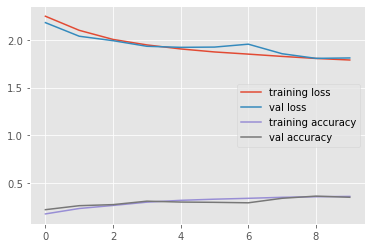

In [24]:
plt.style.use('ggplot')

plt.plot(xaxis, h1.history['loss'], label='training loss')
plt.plot(xaxis, h1.history['val_loss'], label='val loss')
plt.plot(xaxis, h1.history['accuracy'], label='training accuracy')
plt.plot(xaxis, h1.history['val_accuracy'], label='val accuracy')
plt.legend()

In [25]:
print("Accuracy = ", m1.evaluate(x_test, y_test)[1]*100)

313/313 [==============================] - 1s 3ms/step - loss: 1.8101 - accuracy: 0.3510
Accuracy =  35.100001096725464


In [26]:
print(classification_report(y_test.argmax(axis=1), (m1.predict(x_test)).argmax(axis=1), labels=np.arange(0,10) ))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.46      0.41      0.43      1014
           1       0.52      0.25      0.34      1014
           2       0.25      0.09      0.14       952
           3       0.22      0.18      0.20      1016
           4       0.31      0.31      0.31       997
           5       0.33      0.40      0.36      1025
           6       0.34      0.46      0.39       980
           7       0.27      0.51      0.36       977
           8       0.48      0.38      0.43      1003
           9       0.42      0.51      0.46      1022

    accuracy                           0.35     10000
   macro avg       0.36      0.35      0.34     10000
weighted avg       0.36      0.35      0.34     10000



4.
Implement the CNN model for classifying CIFAR10 image dataset by dividing the model into following 4 stages:

a.	Loading and preprocessing the image data

b.	Defining the model's architecture

c.	Training the model

d.	Estimating the model's performance


In [27]:
printShape(x_train, y_train)

Shape = (40000, 3072) and (40000, 10)


In [28]:
printShape(x_test, y_test)

Shape = (10000, 3072) and (10000, 10)


In [29]:
x_train = x_train.reshape(-1, 32,32,3)
printShape(x_train, y_train)

Shape = (40000, 32, 32, 3) and (40000, 10)


In [30]:
x_test = x_test.reshape(-1, 32,32,3)
printShape(x_test, y_test)

Shape = (10000, 32, 32, 3) and (10000, 10)


In [31]:
from keras.layers import Conv2D, Dropout, MaxPool2D, Flatten

In [32]:
m2 = Sequential()
m2.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32,32,3), activation='relu'))
m2.add(MaxPool2D(pool_size=(2,2)))
m2.add(Dropout(0.1))
m2.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
m2.add(MaxPool2D(pool_size=(2,2)))
m2.add(Dropout(0.25))
m2.add(Flatten())
m2.add(Dense(128, activation='relu'))
m2.add(Dense(10, activation='softmax'))

In [33]:
m2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [34]:
m2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)         

In [35]:
h2 = m2.fit(x=x_train, y=y_train, epochs=30, validation_data=(x_test, y_test), batch_size=128)

Epoch 1/30
313/313 [==============================] - 12s 25ms/step - loss: 1.7643 - accuracy: 0.3702 - val_loss: 1.5104 - val_accuracy: 0.4709
Epoch 2/30
313/313 [==============================] - 7s 22ms/step - loss: 1.4484 - accuracy: 0.4863 - val_loss: 1.3758 - val_accuracy: 0.5155
Epoch 3/30
313/313 [==============================] - 7s 22ms/step - loss: 1.3331 - accuracy: 0.5305 - val_loss: 1.2703 - val_accuracy: 0.5505
Epoch 4/30
313/313 [==============================] - 8s 24ms/step - loss: 1.2618 - accuracy: 0.5552 - val_loss: 1.2259 - val_accuracy: 0.5713
Epoch 5/30
313/313 [==============================] - 8s 26ms/step - loss: 1.1912 - accuracy: 0.5816 - val_loss: 1.1864 - val_accuracy: 0.5904
Epoch 6/30
313/313 [==============================] - 9s 28ms/step - loss: 1.1519 - accuracy: 0.5959 - val_loss: 1.1441 - val_accuracy: 0.5979
Epoch 7/30
313/313 [==============================] - 12s 39ms/step - loss: 1.1089 - accuracy: 0.6089 - val_loss: 1.1114 - val_accuracy: 0.61

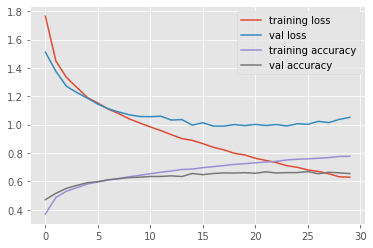

In [36]:
plt.style.use('ggplot')
xaxis=np.arange(0,30)
plt.plot(xaxis, h2.history['loss'], label='training loss')
plt.plot(xaxis, h2.history['val_loss'], label='val loss')
plt.plot(xaxis, h2.history['accuracy'], label='training accuracy')
plt.plot(xaxis, h2.history['val_accuracy'], label='val accuracy')
plt.legend()

In [37]:
print("Accuracy = ", m2.evaluate(x_test, y_test)[1]*100)

313/313 [==============================] - 1s 3ms/step - loss: 1.0515 - accuracy: 0.6545
Accuracy =  65.45000076293945
